# Linear Regression
The Whopper has been Burger King’s signature sandwich since 1957. One Double Whopper with cheese provides 53 grams of protein! That's all the protein you need in a day. It also supplies 1020 calories and 65 grams of fat 😲😲😲. FYI - the Daily Value (based on a 2000-calorie diet) for fat is 65 grams. So after a Double Whopper you’ll want the rest of your calories that day to be fat-free. Of course, the Whopper isn’t the only item Burger King sells. How are fat and protein related on the entire BK menu? The scatterplot of the Fat (in grams) versus the Protein (in grams) for foods sold at Burger King shows a positive, moderately strong, linear relationship.
![Scatterplot of BK](https://raw.githubusercontent.com/SSpindt/AI/refs/heads/main/Semester%201/Problem%20Set%20Images/BKScatter.png)
If you want 25 grams of protein in your lunch, how much fat should you expect to consume at Burger King? The correlation between Fat and Protein is 0.83, a sign that the linear association seen in the scatterplot is fairly strong. But strength of the relationship is only part of the picture. The correlation says, “The linear association between these two variables is fairly strong,” but it doesn’t tell us what the line actually is.
Now we can say more; the equation will let us predict the fat content for any Burger King food, given its amount of protein. 

For the Burger King foods, we’d choose a linear model to describe the relationship between Protein and Fat.
Of course, no line can go through all the points, but a linear model can summarize the general pattern with only a couple of parameters. Like all models of the real world, the line will be wrong — wrong in the sense that it can’t match reality exactly. But it can help us understand how the variables are associated.
Not only can’t we draw a line through all the points, the best line might not even hit any of the points. Then how can it be the “best” line? We want to find the line that somehow comes closer to all the points than any other line. Some of the points will be above the line and some below. For example, the line might suggest that a BK Broiler chicken sandwich with 30 grams of protein should have 36 grams of fat when, in fact, it actually has only 25 grams of fat. The BK Broiler chicken residual would be `actual - predicted = 25 - 36 = -11 g of fat`. The negative residual tells us that the actual fat content of the BK Broiler chicken is about 11 grams less than the model predicts for a typical Burger King menu item with 30 grams of protein. Our challenge now is how to find the right line.

When we draw a line through a scatterplot, some residuals are positive and some negative. We can’t assess how well the line fits by adding up all the residuals—the positive and negative ones would just cancel each other out. We faced the same issue when we calculated a standard deviation to measure spread. And we deal with it the same way here: by squaring the residuals. Squaring makes them all positive. Now we can add them up. Squaring also emphasizes the large residuals. After all, points near the line are consistent with the model, but we’re more concerned about points far from the line. When we add all the squared residuals together, that sum indicates how well the line we drew fits the data — the smaller the sum, the better the fit. A different line will produce a different sum, maybe bigger, maybe smaller. The **line of best fit** is the line for which the sum of squared residuals is smallest! We call this line the **least squares line**. It can be described as `y = mx + b `or more generically as `y = b0 + b1x` (*b0 is the y intercept and b1 is the slope*).You can use the line of best fit to make predictions -- all you have to do is plug in your value for x and solve for y!

## <span style="color:blue">Your Turn</span>
Please solve the following problems using Python, Markdown, and this [data set about movies](https://drive.google.com/file/d/1QmsmZSTI9VOesBH4yL_8LHTxV63Gz2hv/view?usp=drive_link). 

## <span style="color:blue">Problem 1</span>
First, examine the relationship between `budget` and `critics score`. Then, answer these questions:
1. What kind of relationship is found between `budget` and `critics score`? How do you know?
2. Define a function that returns the equation of the line of best fit for `budget` and `critics score`. What is that equation? *You can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, what score would a movie receive if its budget was $10 million? How accurate is this prediction?

In [1]:
import pandas as pd
import seaborn as sb

df = pd.read_json('problem_set.json')

df

,critics score (percent),budget (millions),length (minutes),curse words used (rate per hour)
0,0.0000,17.450712,205.339277,5.227405
1,0.1001,8.126236,194.555289,0.682894
2,0.2002,20.115728,174.979646,4.289700
3,0.3003,33.446048,158.973006,1.176559
4,0.4004,7.288500,189.184481,16.514857
...,...,...,...,...
995,99.5996,204.982695,108.178470,4.195313
996,99.6997,236.364697,83.384166,19.999572
997,99.7998,219.212243,64.025901,1.683303
998,99.8999,201.232115,80.127885,0.863609


<AxesSubplot:xlabel='critics score (percent)', ylabel='budget (millions)'>

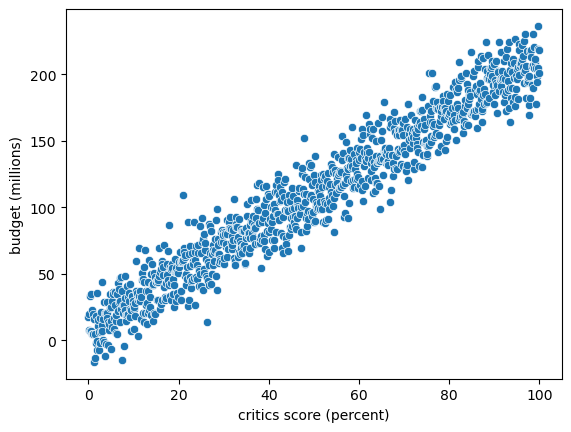

In [2]:
# Write the code you need for question 1 here.

sb.scatterplot(data=df, x='critics score (percent)', y='budget (millions)')

***The relationship between budget (millions) and the critics score is a strong, linear relationship. On the scatterplot, the data is hardly scattered across the graph, demonstrating a relatively strong correlation between the two factors***

In [35]:
def line_of_best_fit(df, x_col, y_col):
    #Calculate the means
    mean_x = df[x_col].mean()
    mean_y = df[y_col].mean()
    
    #Calculate the slope 
    numerator = ((df[x_col] - mean_x) * (df[y_col] - mean_y)).sum()
    denominator = ((df[x_col] - mean_x) ** 2).sum()
    
    m = numerator/denominator
    
    b = mean_y - m * mean_x
    
    # Calculate the predicted y-values
    df['predicted_y'] = m * df[x_col] + b
    
    # Calculate the residuals
    df['residuals'] = df[y_col] - df['predicted_y']
    
    return (m,b, df['residuals'])


result1 = line_of_best_fit(df, 'critics score (percent)', 'budget (millions)')
print(f"Equation: y={result1[0]}x+{result1[1]}")
print("Residual sum:", result1[2].sum())

Equation: y=2.018027596792856x+9.388600997692336
Residual sum: -3.814193405560218e-11


***The equation for the best fit line for the correlation between critics score and budget is y=2x+9.4***

y=2x + 9.4
(10) = 2x+9.4
.6 = 2x
x = .3% critics score


If the budget is $10 million, then the critics score will be at around .3%
This seems accurate as the area around where $10 million would be 0-10% with most clusters around the 0-5% critics ratings area.



## <span style="color:blue">Problem 2</span>
Now, examine the relationship between `length` and `critics score`. Then, answer these questions:
1. What kind of relationship is found between `length` and `critics score`? How do you know?
2. If you haven't done so already, please generalize your Linear Regression function so that it works on all kinds of quantitative data. Once you are done generalizing your function, call it using `length` and `critics score` as arguments. What is the equation of the best fit line? *Reminder, you can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, what score would a movie receive if its length was 150 minutes? How accurate is this prediction?

<AxesSubplot:xlabel='critics score (percent)', ylabel='length (minutes)'>

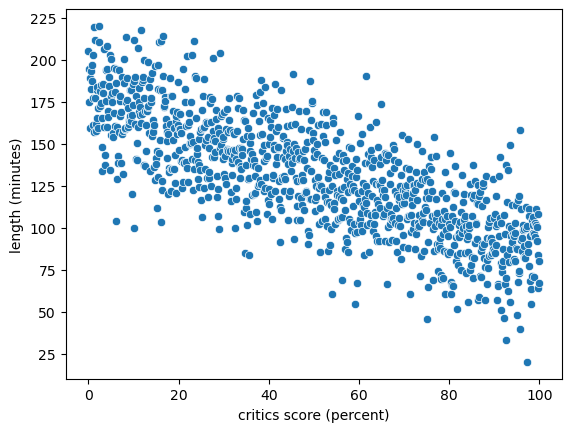

In [11]:
# Write the code you need for question 1 here.
sb.scatterplot(data = df, x='critics score (percent)', y='length (minutes)')

***The relationship between the critics score and the length (minutes) of a movie have a relatively good relationship as the scatterplot appears to be linear in a negative correlation fashion as the graph goes from the top to bottom.***

In [34]:
def line_of_best_fit(df, x_col, y_col):
    #Calculate the means
    mean_x = df[x_col].mean()
    mean_y = df[y_col].mean()
    
    #Calculate the slope 
    numerator = ((df[x_col] - mean_x) * (df[y_col] - mean_y)).sum()
    denominator = ((df[x_col] - mean_x) ** 2).sum()
    
    m = numerator/denominator
    
    b = mean_y - m * mean_x
    
    # Calculate the predicted y-values
    df['predicted_y'] = m * df[x_col] + b
    
    # Calculate the residuals
    df['residuals'] = df[y_col] - df['predicted_y']
    
    return (m,b, df['residuals'])

result2 = line_of_best_fit(df, 'critics score (percent)', 'length (minutes)')
print(f"Equation: y={result2[0]}x+{result2[1]}")
print("Residual sum:", result2[2].sum())

Equation: y=-0.9226664506184858x+176.49290370109534
Residual sum: 4.9112713895738125e-11


The equation for the best line of fit is y = -x + 176.5
(150) = -x + 176.5

-26.5 = -x
x = 26.5%

This is pretty accurate at a 26.5% critics rating fits within the cluster thats adjacent to 150 minutes.

## <span style="color:blue">Problem 3</span>
Finally, examine the relationship between `budget` and `curse words used`. Then, answer these questions:
1. What kind of relationship is found between `budget` and `curse words used`? How do you know?
2. Generalize your Linear Regression function even more. You should be able to call it and have it work on any quantitative data without changing anything about the function definition. Once you are done generalizing your function, call it using `budget` and `curse words used` as arguments. What is the equation of the best fit line? *Reminder, you can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, how many curse words would be used during a movie if it had a $5 million dollar budget? How accurate is this prediction?

<AxesSubplot:xlabel='budget (millions)', ylabel='curse words used (rate per hour)'>

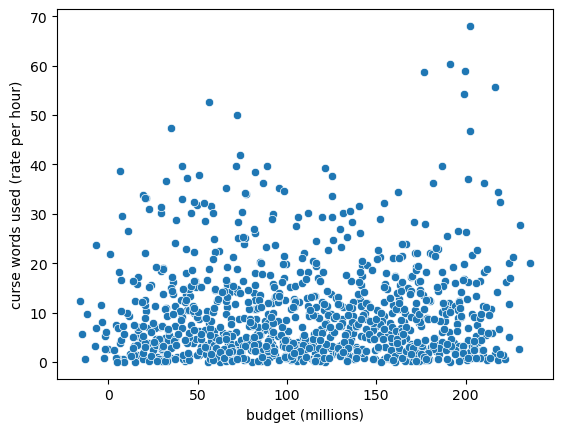

In [27]:
sb.scatterplot(data=df, x='budget (millions)', y='curse words used (rate per hour)')

***It appears as if there is no relationship between the budget and the curse words used as there is no clear line in the scatterplot/correlation demonstrated in the graph.***

In [33]:
def line_of_best_fit(df, x_col, y_col):
    #Calculate the means
    mean_x = df[x_col].mean()
    mean_y = df[y_col].mean()
    
    #Calculate the slope 
    numerator = ((df[x_col] - mean_x) * (df[y_col] - mean_y)).sum()
    denominator = ((df[x_col] - mean_x) ** 2).sum()
    
    m = numerator/denominator
    
    b = mean_y - m * mean_x
    
    # Calculate the predicted y-values
    df['predicted_y'] = m * df[x_col] + b
    
    # Calculate the residuals
    df['residuals'] = df[y_col] - df['predicted_y']
    
    return (m,b, df['residuals'])


result3 = line_of_best_fit(df, 'budget (millions)', 'curse words used (rate per hour)')
print(f"Equation: y={result3[0]}x+{result3[1]}")
print("Residual sum:", result3[2].sum())

Equation: y=0.00578065095976985x+9.240233598815546
Residual sum: 1.41824330057716e-11


The equation for the relationship between the budget of the movie and the curse words used is y = 0.0058x + 9.24

y = .0058(5) + 9.24
y = 9.269 curse words per hour

The accuracy of the line of best fit cannot be effectively pedicted as a rate of 9.269 curse words per hour fits along every budget due to hardly no correlation

## <span style="color:blue">Problem 4</span>
Compare Linear Regression algorithms with someone from a different table. Then, answer these questions:
1. How are your algorithms similar? Different?
2. Whose algorithm was more accurate for problem 1? Problem 2? Problem 3?
3. Why do you think that algorithm was more accurate for one or all of these problems?

***Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.***

George used the squares method, I used least-squares method.

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.***

For all the problems, my residual score was alot lower (near zero) than George's

***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***

The accuracy is consistent with all problems as they all follow the same algorithm along the same types of data (numerical values)